In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score

from mlgrad.funcs import Exp, Hinge, Hinge2, Sigmoidal
import mlgrad.plots as plots
from sys import float_info

from math import sqrt

In [2]:
from mlgrad.cls import MarginMaximization

In [3]:
X, Y = datasets.load_iris(return_X_y=True)
U = decomposition.PCA(n_components=2).fit_transform(X)

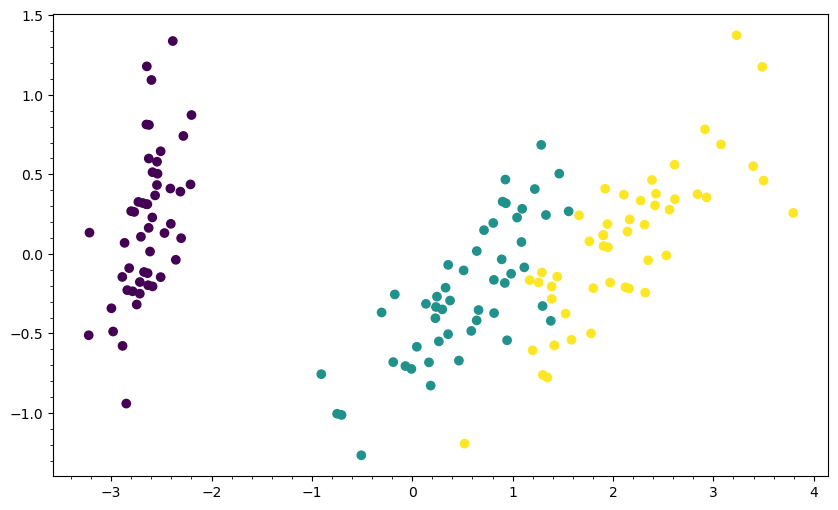

In [4]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U[:,0], U[:,1], c=Y, s=36)
plt.minorticks_on()
plt.show()

In [5]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)
Y2 = Y2.astype('d')
N = len(Y2)

In [6]:
def calc_zz(mod, xr, yr):
    xrange = np.linspace(xr[0], xr[1], 101)
    yrange = np.linspace(yr[0], yr[1], 101)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

In [12]:
mm = MarginMaximization(Hinge(0.), h=0.01, tol=1.0e-8)

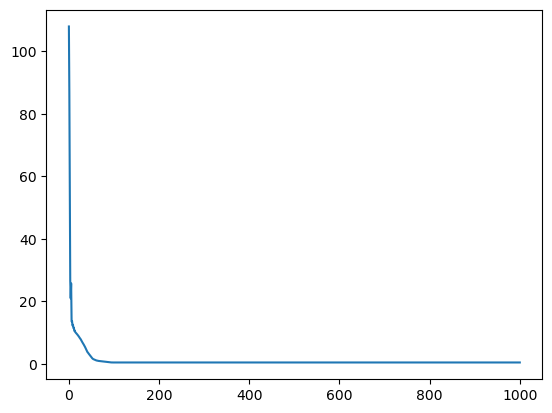

999


In [13]:
mm.fit(U2, Y2)
plt.plot(mm.lvals)
plt.show()
print(mm.K)

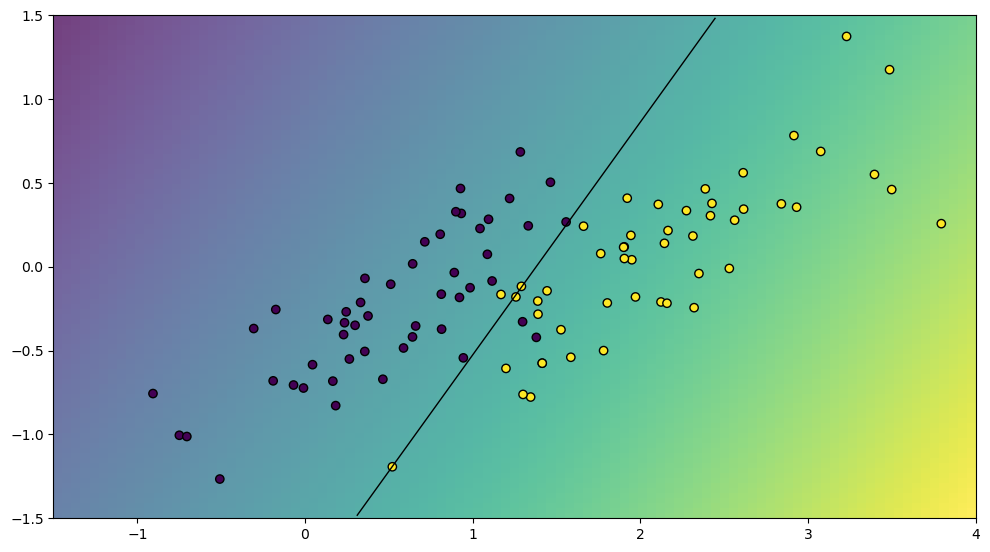

In [14]:
ZZ = calc_zz(mm, [-1.5, 4], [-1.5, 1.5])
extent = (-1.5, 4, -1.5, 1.5)
plt.figure(figsize=(10,6))
plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=36)
cb = plt.imshow(ZZ, origin='lower', extent=extent, alpha=0.75)
plt.contour(ZZ, levels=[0], origin='lower', extent=extent, linewidths=1, colors='k')
# plt.contour(ZZ, levels=np.linspace(-2, 2, 21), origin='lower', extent=extent, linewidths=0.5, linestyles='--')
# plt.colorbar(cb, )
plt.xlim(-1.5, 4)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()

In [15]:
accuracy_score(Y2, np.sign(mm.evaluate(U2)))

0.95

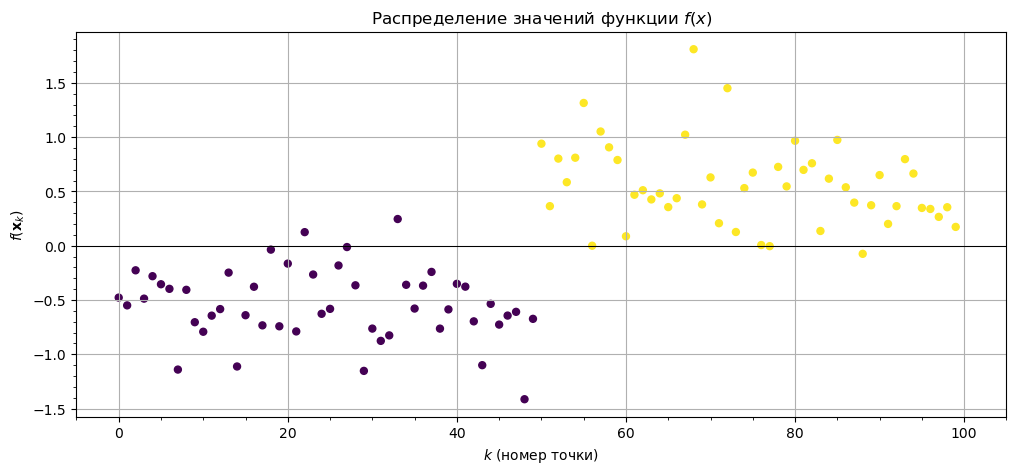

In [16]:
plt.figure(figsize=(12,5))
plots.plot_cls_function(mm, U2, Y2)
plt.show()

In [12]:
# A=np.array([1,2,3,4,5,6,7,8,9,10,11,12], 'd')
# B = A[1:-1]

In [13]:
# %load_ext cython

In [14]:
# %%cython
# import numpy as np
# from mlgrad.array_allocator cimport _memoryview_start_and_len

# A=np.array([1,2,3,4,5,6,7,8,9,10,11,12], 'd')
# B = A[1:-1]

# cdef double[::1] aa = A
# cdef double[::1] bb = B

# print(_memoryview_start_and_len(aa))
# print(_memoryview_start_and_len(bb))
